In [15]:
# 모듈 로드
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor 

import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 로드
df=pd.read_excel('preprocessing_onehot.xlsx')
df

,C0,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C1_세종특별자치시,C1_경기도,C1_강원특별자치도,C1_충청북도,C1_충청남도,C1_전북특별자치도,C1_전라남도,C1_경상북도,C1_경상남도,C1_제주특별자치도
0,2009,49773145,63.4,63.4,65.8,65.6,88.2,64.5,63.7,5565,...,False,False,False,False,False,False,False,False,False,False
1,2010,50515666,64.3,65.3,67.7,66.8,93.5,65.7,64.8,5695,...,False,False,False,False,False,False,False,False,False,False
2,2011,50734284,64.9,66.6,70.1,68.8,100.0,67.1,66.4,5646,...,False,False,False,False,False,False,False,False,False,False
3,2012,50948272,66.0,68.5,71.9,70.6,104.2,68.8,67.7,4934,...,False,False,False,False,False,False,False,False,False,False
4,2013,51141463,67.5,70.1,73.8,72.5,106.9,70.8,69.1,4899,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2019,670989,74.9,83.4,84.8,84.8,130.1,85.0,81.5,74,...,False,False,False,False,False,False,False,False,False,True
263,2020,674635,76.2,85.8,87.4,87.3,135.2,88.0,83.8,73,...,False,False,False,False,False,False,False,False,False,True
264,2021,676759,77.3,87.6,88.7,89.8,140.3,90.9,86.1,72,...,False,False,False,False,False,False,False,False,False,True
265,2022,678159,78.4,90.2,90.7,92.6,146.1,94.2,88.5,76,...,False,False,False,False,False,False,False,False,False,True


In [5]:
# target과 feature 분리
y_target=df['C63']
X_data=df.drop(['C63'],axis=1,inplace=False)

In [6]:
# rt=RandomForestRegressor(random_state=0, n_estimators=1000)
# neg_mse_scores=cross_val_score(rt,X_data,y_target,scoring="neg_mean_squared_error",cv=5)
# rmse_scores=np.sqrt(-1*neg_mse_scores)
# avg_rmse=np.mean(rmse_scores)


In [7]:
# print('5 교차 검증의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
# print('5 교차 검증의 개별 RMSE scores : ',np.round(rmse_scores,2))
# print('5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

In [8]:
rt=RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores=cross_val_score(rt,X_data,y_target,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('10 교차 검증의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
print('10 교차 검증의 개별 RMSE scores : ',np.round(rmse_scores,2))
print('10 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))


10 교차 검증의 개별 Negative MSE scores: [-2.6081849e+09 -9.6152973e+05 -2.6058218e+05 -2.7352570e+04
 -2.5657599e+05 -6.1462170e+04 -1.2470910e+04 -2.6007330e+04
 -3.6666810e+04 -6.3106400e+04]
10 교차 검증의 개별 RMSE scores :  [51070.39   980.58   510.47   165.39   506.53   247.92   111.67   161.27
   191.49   251.21]
10 교차 검증의 평균 RMSE: 5419.691


In [9]:
# rt=RandomForestRegressor(random_state=0, n_estimators=100)
# neg_mse_scores=cross_val_score(rt,X_data,y_target,scoring="neg_mean_squared_error",cv=10)
# rmse_scores=np.sqrt(-1*neg_mse_scores)
# avg_rmse=np.mean(rmse_scores)

# print('n_estimators=100','-'*30)
# print('10 교차 검증의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
# print('10 교차 검증의 개별 RMSE scores : ',np.round(rmse_scores,2))
# print('10 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

In [10]:
# rt=RandomForestRegressor(random_state=0, n_estimators=1000)
# neg_mse_scores=cross_val_score(rt,X_data,y_target,scoring="neg_mean_squared_error",cv=64)
# rmse_scores=np.sqrt(-1*neg_mse_scores)
# avg_rmse=np.mean(rmse_scores)


# print('n_estimators=1000','-'*30)
# print('64 교차 검증의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
# print('64 교차 검증의 개별 RMSE scores : ',np.round(rmse_scores,2))
# print('64 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))


In [19]:
def get_model_cv_prediction(model,X_data,y_target,cv):
    neg_mse_scores=cross_val_score(model,X_data,y_target,scoring="neg_mean_squared_error",cv=cv)
    rmse_scores=np.sqrt(-1*neg_mse_scores)
    avg_rmse=np.mean(rmse_scores)
    print('#####',model.__class__.__name__,'#####')
    print(f'{cv} 교차 검증의 평균 RMSE : {avg_rmse:.3f}')

In [20]:
dt_reg=DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg=RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg=GradientBoostingRegressor(random_state=0,n_estimators=1000)
xgb_reg=XGBRegressor(n_estimators=1000)
lgb_reg=LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모댈을 반복하면서 평가 수행
cv=10
models=[dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model,X_data,y_target,cv)

##### DecisionTreeRegressor #####
10 교차 검증의 평균 RMSE : 5852.073
##### RandomForestRegressor #####
10 교차 검증의 평균 RMSE : 5419.691
##### GradientBoostingRegressor #####
10 교차 검증의 평균 RMSE : 5979.388
##### XGBRegressor #####
10 교차 검증의 평균 RMSE : 6278.822
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3563
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 70
[LightGBM] [Info] Start training from score 4567.037500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

<Axes: xlabel='None', ylabel='None'>

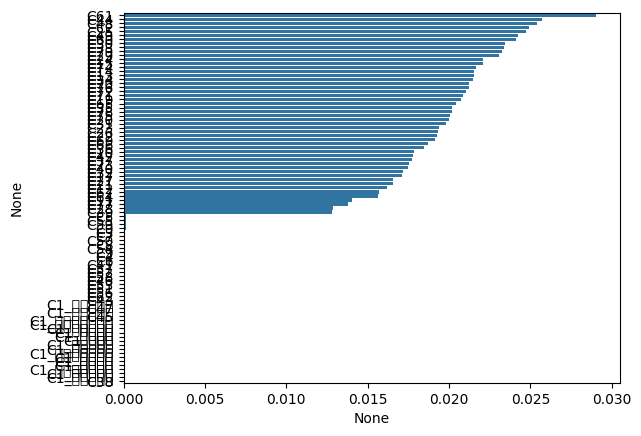

In [21]:
# 모델의 피쳐별 중요도 시각화

rf_reg.fit(X_data,y_target)

feature_series=pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

In [ ]:
dt_reg=DecisionTreeRegressor(random_state=0, max_depth=50,criterion='squared_error',
    splitter='best')
rf_reg=RandomForestRegressor(random_state=0, n_estimators=1000,criterion='squared_error',
    max_depth=50)
gb_reg=GradientBoostingRegressor(random_state=0,n_estimators=1000,max_depth=50)
xgb_reg=XGBRegressor(n_estimators=1000,max_depth=50)
lgb_reg=LGBMRegressor(n_estimators=1000,max_depth=50)

# 트리 기반의 회귀 모댈을 반복하면서 평가 수행
cv=10
models=[dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model,X_data,y_target,cv)

##### DecisionTreeRegressor #####
10 교차 검증의 평균 RMSE : 5846.475
##### RandomForestRegressor #####
10 교차 검증의 평균 RMSE : 5419.691
##### GradientBoostingRegressor #####
10 교차 검증의 평균 RMSE : 5570.779
##### XGBRegressor #####
10 교차 검증의 평균 RMSE : 6278.626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3563
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 70
[LightGBM] [Info] Start training from score 4567.037500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl